# Real Estate Price Prediction [ Banglore ]


In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

### Data Load: Load banglore home prices into a dataframe as df


In [116]:
# method 1 for loading data 
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

# multiple method 
"""
# 1st M
df1 = pd.read_csv(r"D:\1_PROJECTS\Real Estate Price Prediction [ Banglore ]\bengaluru_house_prices.csv")
df1.head()

# 2nd M.
df1 = pd.read_csv("D:\\1_PROJECTS\\Real Estate Price Prediction [ Banglore ]\\bengaluru_house_prices.csv")
df1.head()

"""


'\n# 1st M\ndf1 = pd.read_csv(r"D:\x01_PROJECTS\\Real Estate Price Prediction [ Banglore ]\x08engaluru_house_prices.csv")\ndf1.head()\n\n# 2nd M.\ndf1 = pd.read_csv("D:\\1_PROJECTS\\Real Estate Price Prediction [ Banglore ]\\bengaluru_house_prices.csv")\ndf1.head()\n\n'

In [117]:
#  Get the shape of `df1` (rows, columns).

df1.shape

(13320, 9)

In [118]:
# Retrieve the column names of `df1`.
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [119]:
# Get unique values in the `area_type` column of `df1`.
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [120]:
# Count occurrences of each unique value in the `area_type` column of `df1`.
df1['area_type'].value_counts()


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### Drop features that are not required to build our model

In [121]:
# Drop specified columns from `df1` and get the shape of the resulting DataFrame `df2`.
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.shape


(13320, 5)

### Data Cleaning: Handle NA values

In [ ]:
# Check for missing values in each column of `df2`.
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [123]:
df2.shape

(13320, 5)

In [124]:
# Remove rows with missing values from `df2` and check for any remaining missing values in `df3`.
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [125]:
# Get the number of rows and columns in `df3`.
df3.shape


(13246, 5)

In [126]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Feature Engineering
### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [127]:
# Extract the integer value of BHK from the `size` column and create a new `bhk` feature in `df3`.
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  #here we get 2 token (2 BHK) seperated by space we take 1st which is 2.
df3.bhk.unique()


C:\Users\OM\AppData\Local\Temp\ipykernel_17032\3896693784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  #here we get 2 token (2 BHK) seperated by space we take 1st which is 2.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [128]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [129]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [130]:
df3[df3.bhk > 20] # here we find error

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [131]:
df3.total_sqft.unique() # we got some values like range '1133 - 1384' taking mean and replac it.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [132]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [133]:
# Display the first 10 rows in `df3` where `total_sqft` cannot be converted to a float. it is having unique values

df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. we are going to just drop such corner cases to keep things simple

In [134]:
# Function to convert `total_sqft` to a numeric value, handling ranges by taking the average.
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None


In [135]:
convert_sqft_to_num('3090 - 5002')

4046.0

In [136]:
# Create a copy of `df3`, convert `total_sqft` to numeric values, remove rows with null `total_sqft`, and display the first 2 rows.
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(3)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [137]:
# Display the row at index 30 in `df3`.
df3.loc[30]


location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [138]:
# Display the row at index 30 in `df4` after applying convert_sqft_to_num() function.
df4.loc[30]


location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering

### Add new feature called price per square feet for calculating value 


In [139]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [140]:
# Get descriptive statistics for the `price_per_sqft` column in `df5`.
df5_stats = df5['price_per_sqft'].describe()
df5_stats


count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [141]:
# Save the DataFrame `df5` to a CSV file named "bhp.csv" without the index.
df5.to_csv("bhp.csv", index=False)


In [142]:
len(df5.location.unique())

1298

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [143]:
# Clean the `location` column and get counts of each unique location.
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats


Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [144]:
# Calculate the total number of entries in the `location_stats`.
location_stats.values.sum()


13200

In [145]:
# Count the number of locations with more than 10 entries in `location_stats`.
len(location_stats[location_stats > 10])


240

In [146]:
# Get the total number of unique locations in `location_stats`.
len(location_stats)


1287

In [147]:
# Count the number of locations with 10 or fewer entries in `location_stats`.
len(location_stats[location_stats <= 10])

1047

## Dimensionality Reduction

#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [148]:
# Filter `location_stats` to get locations with 10 or fewer entries and display the result.
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [149]:
len(df5.location.unique())

1287

In [150]:
# Replace locations with 10 or fewer entries in `df5` with 'other', and count the unique locations.
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())


241

In [151]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal Using Business Logic

#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [152]:
# Show all rows in `df5` where the total square footage per bedroom is less than 300 sqft (potential outliers).

df5[df5.total_sqft / df5.bhk < 300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [153]:
df5.shape

(13200, 7)

In [154]:
# Remove outliers with less than 300 sqft per bedroom and get the shape of `df6`.
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape


(12456, 7)

## Outlier Removal Using Standard Deviation and Mean

In [155]:
# Get descriptive statistics for the `price_per_sqft` column in `df6`.
df6.price_per_sqft.describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [156]:
# Function to remove outliers in `price_per_sqft` using z-score method by location, then get the shape of the resulting DataFrame `df7`.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6) #new df df7 which is without outlier of df6
df7.shape

#outlier is represent the extreme varaition i dataset

(10242, 7)

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like


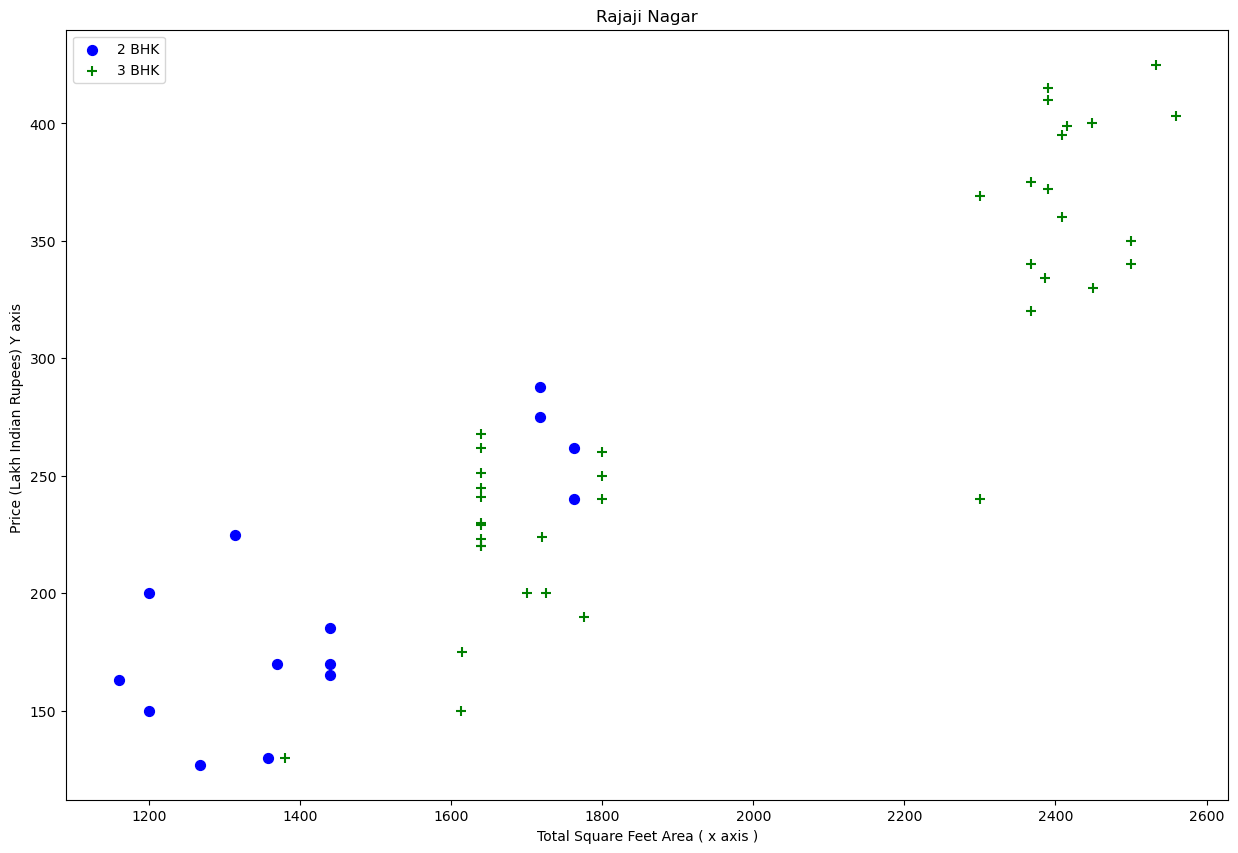

In [159]:
# Function to plot a scatter chart for 2 BHK and 3 BHK properties in a specified location, 
# showing total square footage against price.

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area ( x axis )")
    plt.ylabel("Price (Lakh Indian Rupees) Y axis ")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Rajaji Nagar")  # giving input -  (dataframe, location)


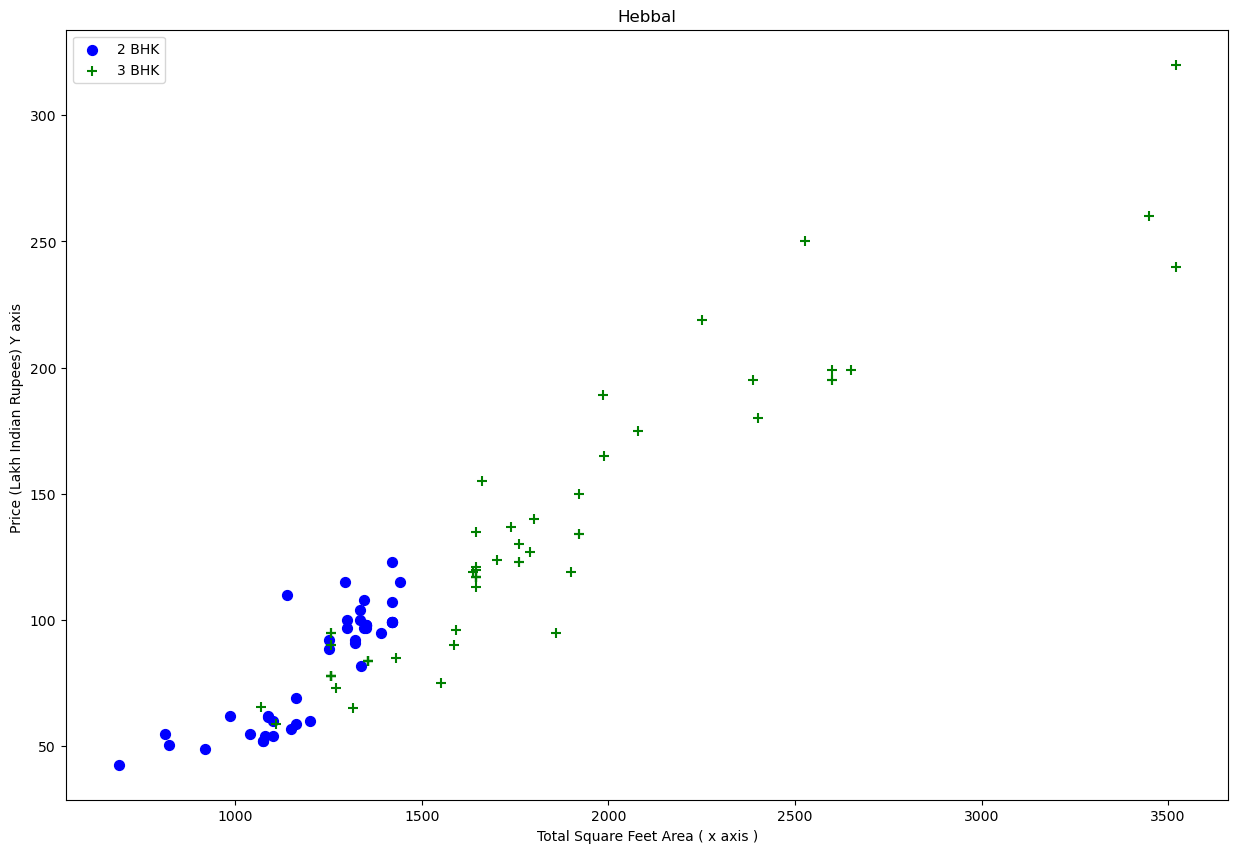

In [158]:
# Function to plot a scatter chart for 2 BHK and 3 BHK properties in a specified location, 
# showing total square footage against price.



def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area ( x axis )")
    plt.ylabel("Price (Lakh Indian Rupees) Y axis ")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Hebbal")  # giving input -  (dataframe, location)


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment


In [164]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

# Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

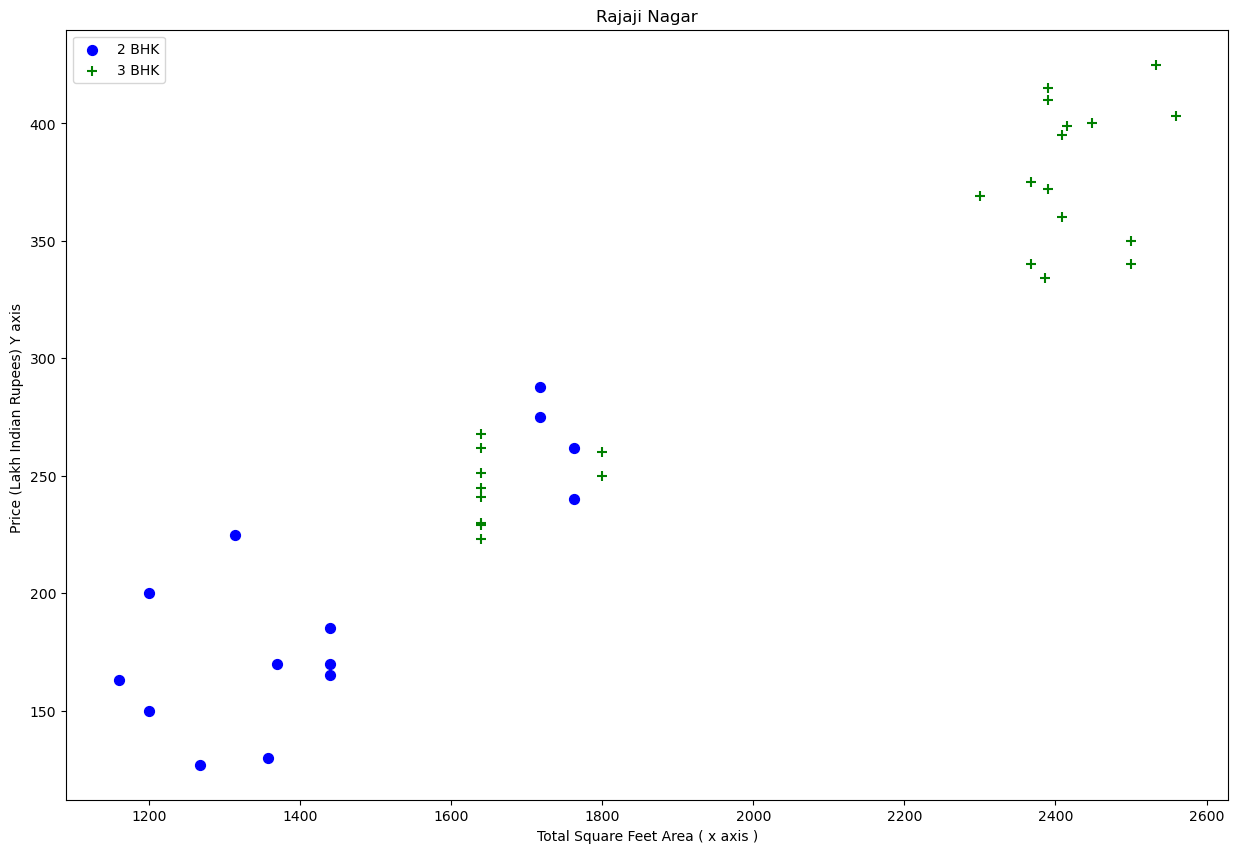

In [167]:
plot_scatter_chart(df8,"Rajaji Nagar")  #afte removing outliers

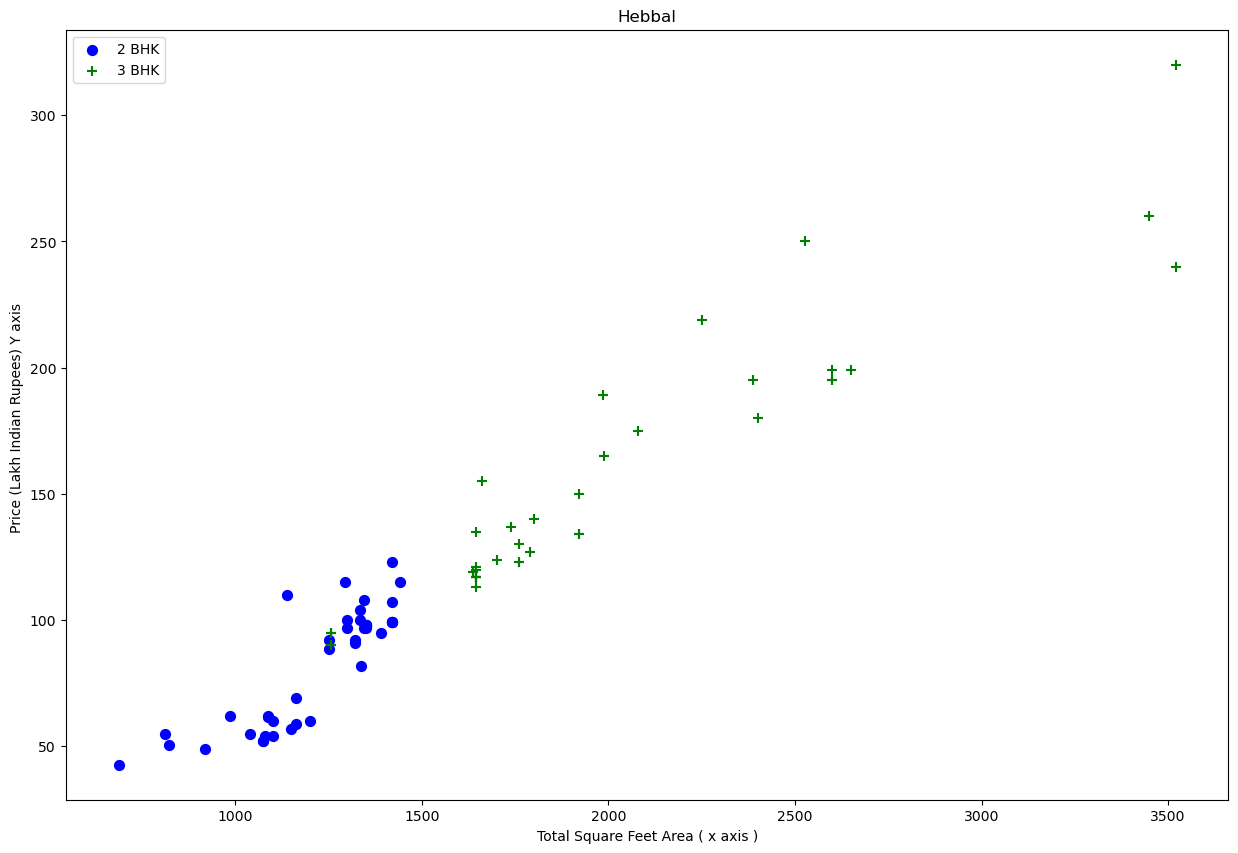

In [166]:
plot_scatter_chart(df8,"Hebbal") #afte removing outliers 

## Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

### Before and after outlier removal: Rajaji Nagar

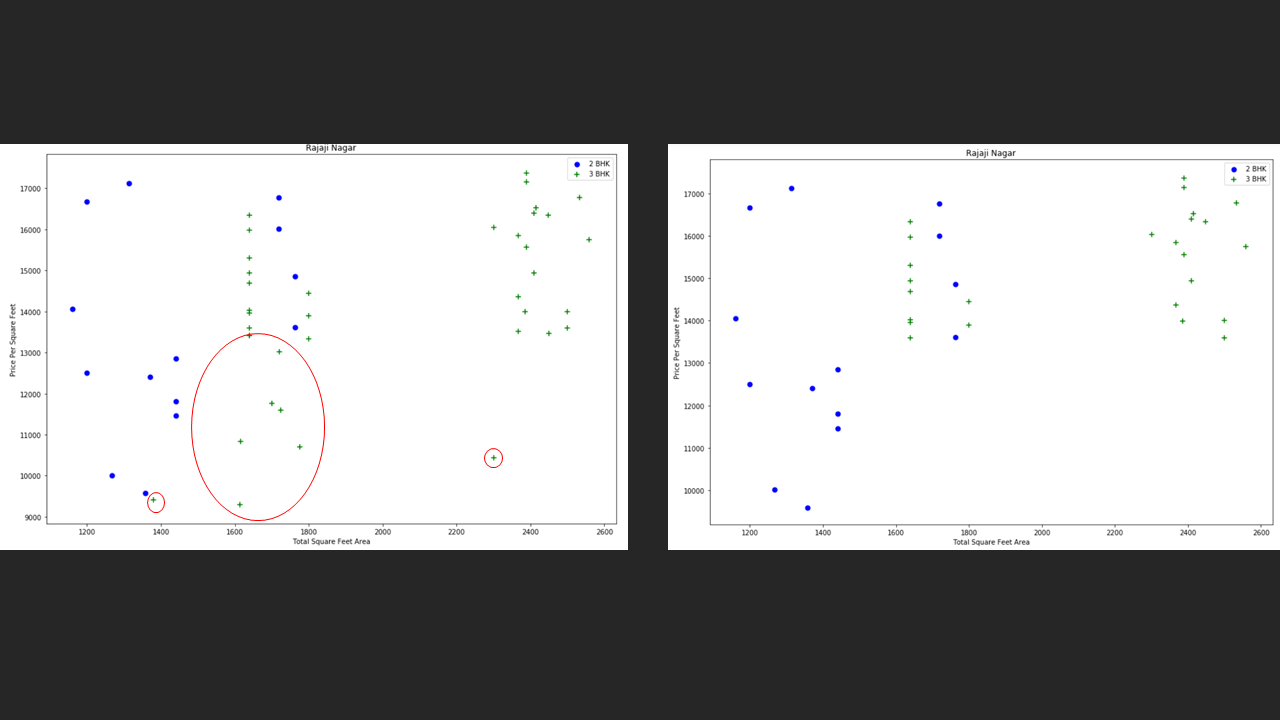

## Before and after outlier removal: Hebbal

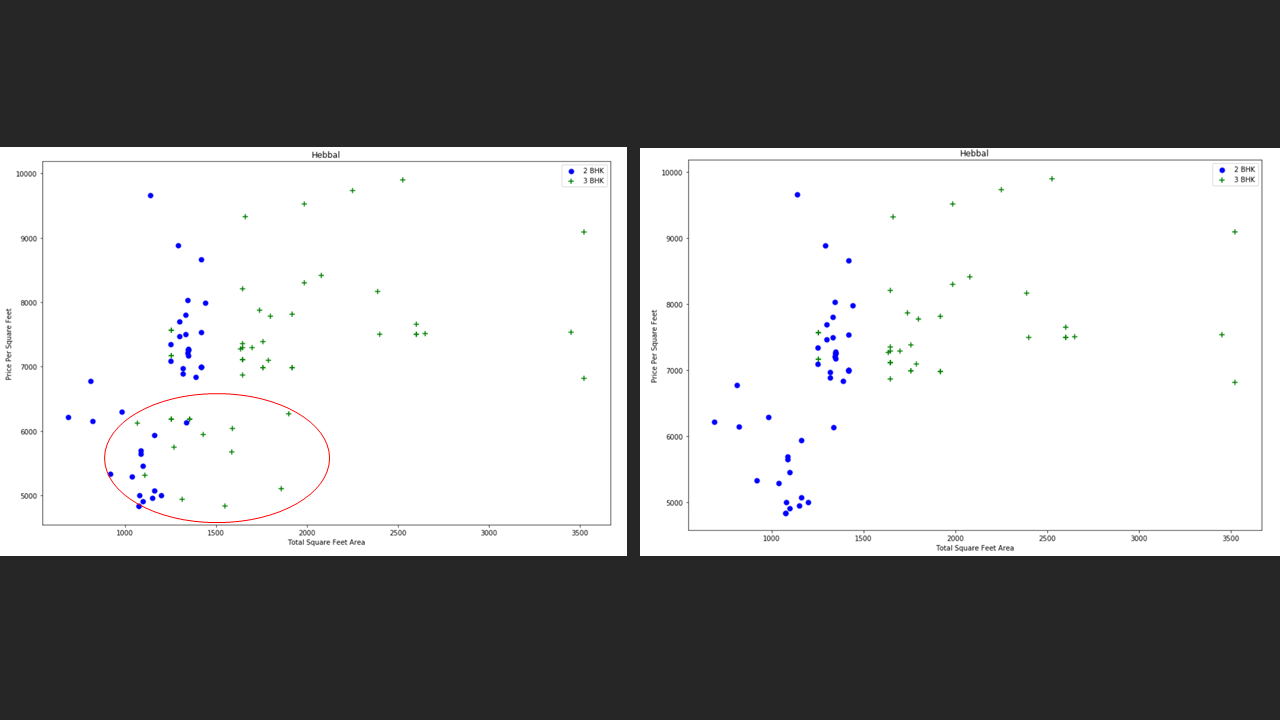

Text(0, 0.5, 'Count')

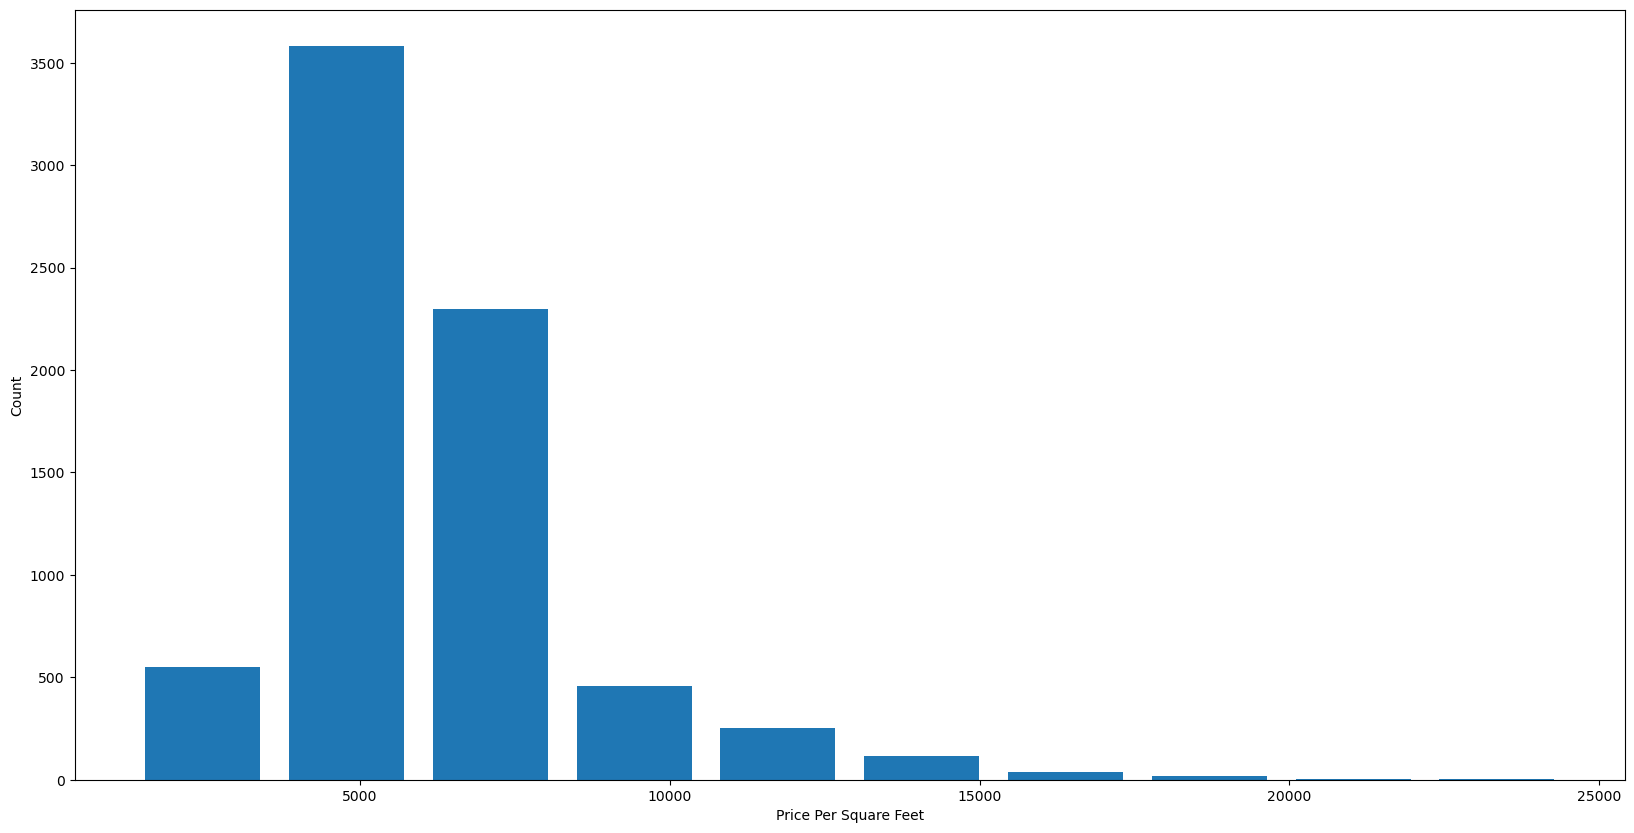

In [169]:
# Set figure size, then plot a histogram to visualize the distribution of `price_per_sqft` in `df8`.
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# we are having most of the properties in between 0-10000 price per sqft

# Outlier Removal Using Bathrooms Feature

In [170]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

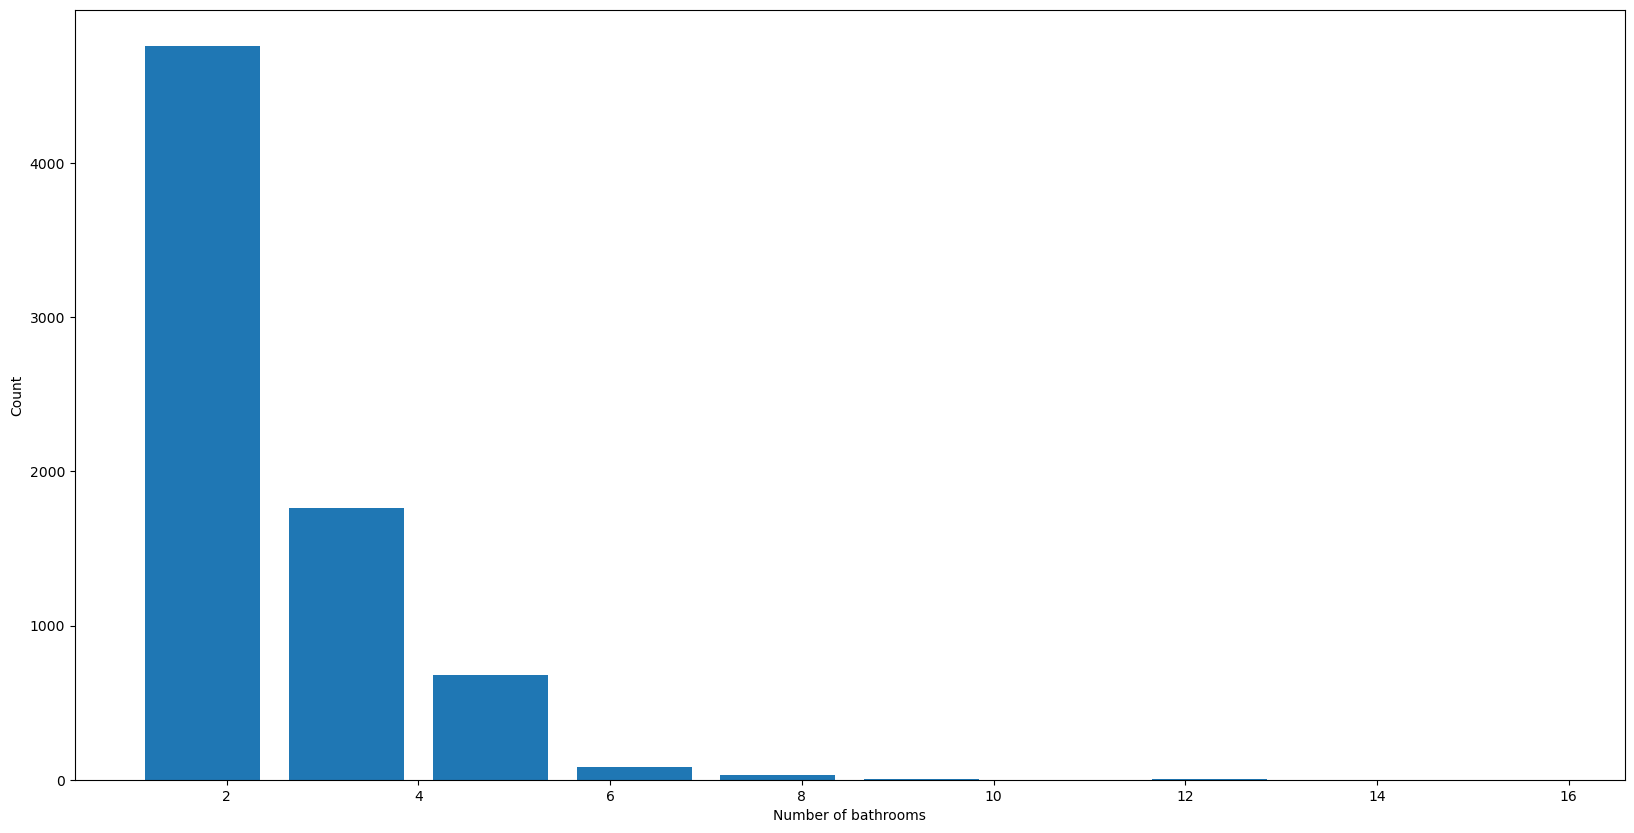

In [172]:
# Plot a histogram to show the distribution of the number of bathrooms in `df8`.
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


# if a property having more no. of  bathroom than rooms + 2 then remove it after discussing with manager

In [175]:
# Display rows in `df8` where the number of bathrooms is greater than 10 (to identify outliers).
df8[df8.bath > 10]



,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


## It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [177]:
# Show rows where bathrooms exceed bedrooms by more than 2 (i.e outliers).
df8[df8.bath > df8.bhk + 2]

#here we have property with 4 bedroom and 7 bathrooms so reemove it 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


#### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed


In [178]:
# Remove outliers where bathrooms exceed bedrooms by more than 1 and get the shape of `df9`.
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape


(7239, 7)

In [179]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [180]:
# Drop the `size` and `price_per_sqft` columns from `df9` to create `df10`, then display the first 3 rows.
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head(3)

# removing some column which is only created for outlier detection 

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# Use One Hot Encoding For Location

One Hot Encoding is a method used to convert categorical variables into a format that can be provided to machine learning algorithms.

How it works: For each category in the column, it creates a new binary column (0 or 1).
Example: If you have a column "Color" with values "Red," "Green," and "Blue," One Hot Encoding will create three new columns: "Color_Red," "Color_Green," and "Color_Blue."
Each row will have a 1 in the column corresponding to its color and 0s in the others.
This way, machine learning models can work with categorical data effectively.

In [182]:
# Apply One Hot Encoding to the `location` column in `df10`, creating binary columns for each location, and display the first 3 rows.
dummies = pd.get_dummies(df10.location)
dummies.head(3)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# Concatenate the original DataFrame `df10` with the One Hot Encoded `dummies`, dropping the 'other' column to create `df11`.
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
# Drop the original `location` column from `df11` to create `df12`, as it's already represented in the One Hot Encoded format.
df12 = df11.drop('location', axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
df12.shape

(7239, 244)

# Build a Model Now...

## Independent varaible which is X

In [187]:
# Keep only the independent variables by dropping the `price` column from `df12` and store the result in `X`.
X = df12.drop(['price'], axis='columns')
X.head(3)  # Display the first 3 rows of the DataFrame `X`.


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
X.shape

(7239, 243)

## dependent variable which is y

In [189]:
# Store the dependent variable `price` from `df12` in `y` and display the first 3 rows.
y = df12.price
y.head(3)


0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [193]:
y.shape

#or
#len(y)

(7239,)

In [194]:
# Split the dataset into training and testing sets, using 80% of the data for training and 20% for testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


C:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [196]:
# Create a Linear Regression model, fit it with the training data, and evaluate its performance on the test data.

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

# Calculate the R² score to measure how well the model explains the variance in the price on the test set.
lr_clf.score(X_test, y_test)


0.8629132245229442

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [ ]:
# Import ShuffleSplit for cross-validation and calculate cross-validation scores for the Linear Regression model.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# Perform cross-validation to evaluate the model's performance by splitting the data into different subsets.
cross_val_score(LinearRegression(), X, y, cv=cv)


We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

## GridSearchCV automates the process of searching for the best hyperparameters, making your model more effective and robust.

GridSearchCV is a tool for finding the best settings (hyperparameters) for a machine learning model. It works by:

Testing different combinations of hyperparameters you specify.
Using cross-validation to check how well each combination performs.
Identifying the combination that gives the best results.
This helps improve your model's performance and accuracy on new data.

In [205]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    # Define algorithms and their corresponding parameters
    algos = {
        'linear_regression': {
            # Create a pipeline with StandardScaler for normalization and Linear Regression
            'model': make_pipeline(StandardScaler(), LinearRegression()),
            'params': {}  # No parameters needed for Linear Regression
        },
        'lasso': {
            # Lasso regression with hyperparameter tuning
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],  # Regularization strength
                'selection': ['random', 'cyclic']  # Selection strategy
            }
        },
        'decision_tree': {
            # Decision Tree Regressor with hyperparameter tuning
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Updated criterion for decision trees
                'splitter': ['best', 'random']  # Strategy used to choose the split at each node
            }
        }
    }
    
    scores = []  # List to hold the results of the models
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # Cross-validation strategy

    # Iterate over the algorithms and perform Grid Search
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)  # Initialize GridSearchCV
        gs.fit(X, y)  # Fit the model to the data
        # Append the results to the scores list
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,  # Best score achieved
            'best_params': gs.best_params_  # Best parameters found
        })

    # Return the results as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function with your data
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.847796,{}
1,lasso,0.726783,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.728454,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Based on above results we can say that LinearRegression gives the best score. Hence we will use that.


### Keynote on Warning Related to normalize in Scikit-Learn

#### Issue:
Warning about the normalize parameter in LinearRegression.

#### What It Means:
normalize is deprecated (not recommended) since version 1.0 and will be removed in version 1.2.

#### Reason for Warning:
Using normalize may lead to errors in future Scikit-Learn versions.

#### Recommended Solution:
Use a Pipeline with StandardScaler for data scaling.

#### Benefits of Using StandardScaler:
Future Compatibility: Avoids issues since normalize is deprecated,
Flexibility: Standardizes features, improving model performance,
Enhanced Performance: Better convergence for sensitive algorithms,
Consistency: Uniform scaling across models and pipelines,
Robustness: Handles various data distributions effectively, 
Easier Sample Weights: Simplifies weight handling in pipelines,

#### Conclusion:
Using StandardScaler in a pipeline enhances model performance, ensures compatibility with future updates, and provides greater flexibility in preprocessing.


# Test the model for few properties

### Short Use Case:
#### This function predicts the price of a property based on its location, square footage, number of bathrooms, and bedrooms (BHK).

In [208]:
import pandas as pd

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Create a DataFrame for the input to maintain feature names
    x_df = pd.DataFrame([x], columns=X.columns)
    return lr_clf.predict(x_df)[0]


In [216]:
predicted_price = predict_price('1st Phase JP Nagar', 1000, 2, 2)
print(predicted_price)

"""
Explanation:
'1st Phase JP Nagar': This is the location of the property.
1000: This is the square footage of the property.
2: This indicates the number of bathrooms.
2: This indicates the number of bedrooms (BHK).

"""

# thia will show price in lakhs like 83 lakhs

83.86570258312348


"\nExplanation:\n'1st Phase JP Nagar': This is the location of the property.\n1000: This is the square footage of the property.\n2: This indicates the number of bathrooms.\n2: This indicates the number of bedrooms (BHK).\n\n"

In [213]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

# thia will show price in lakhs like 86 lakhs

86.08062284987106

In [218]:
predict_price('Indira Nagar',1000, 2, 2)

# thia will show price in lakhs like 1 Cr 93 lakhs

193.31197733179957

In [217]:
predict_price('Indira Nagar',1000, 3, 3)

195.52689759854715

# Export the tested model to a pickle file

In [219]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [220]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))